
## **Quality Control Data Analysis**

This notebook provides a **comprehensive Exploratory Data Analysis (EDA)** and **descriptive statistics** for the `quality_control.csv` dataset.  
The analysis explores machine performance, production quality, vibration levels, and energy efficiency to identify opportunities for process and quality optimization.


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "quality_control.csv"  # Ensure the file is in the same directory
df = pd.read_csv(file_path)

# Display basic info and preview
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Timestamp                 10000 non-null  object 
 1   Temperature (°C)          10000 non-null  float64
 2   Machine Speed (RPM)       10000 non-null  int64  
 3   Production Quality Score  10000 non-null  float64
 4   Vibration Level (mm/s)    10000 non-null  float64
 5   Energy Consumption (kWh)  10000 non-null  float64
 6   Optimal Conditions        10000 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 547.0+ KB


,Timestamp,Temperature (°C),Machine Speed (RPM),Production Quality Score,Vibration Level (mm/s),Energy Consumption (kWh),Optimal Conditions
0,4/1/2025 8:00,78.92,1461,8.49,0.07,1.97,0
1,4/1/2025 8:01,71.83,1549,8.97,0.04,1.01,0
2,4/1/2025 8:02,74.88,1498,8.52,0.08,1.60,0
3,4/1/2025 8:03,77.27,1478,8.28,0.09,1.87,0
4,4/1/2025 8:04,76.50,1524,8.07,0.04,1.53,0


## Descriptive Statistics

In [ ]:

# Display descriptive statistics for all columns
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Timestamp,10000,10000,4/8/2025 6:23,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature (°C),10000.0,NaN,NaN,NaN,74.989407,1.985371,67.58,73.66,75.0,76.34,82.47
Machine Speed (RPM),10000.0,NaN,NaN,NaN,1499.5624,29.059738,1450.0,1474.0,1500.0,1525.0,1549.0
Production Quality Score,10000.0,NaN,NaN,NaN,8.500839,0.287774,8.0,8.25,8.5,8.75,9.0
Vibration Level (mm/s),10000.0,NaN,NaN,NaN,0.065218,0.020607,0.03,0.05,0.07,0.08,0.1
Energy Consumption (kWh),10000.0,NaN,NaN,NaN,1.499053,0.288139,1.0,1.25,1.5,1.75,2.0
Optimal Conditions,10000.0,NaN,NaN,NaN,0.0966,0.295427,0.0,0.0,0.0,0.0,1.0


## Missing Values

In [ ]:

# Check for missing data
df.isnull().sum().sort_values(ascending=False)


,0
Timestamp,0
Temperature (°C),0
Machine Speed (RPM),0
Production Quality Score,0
Vibration Level (mm/s),0
Energy Consumption (kWh),0
Optimal Conditions,0


## Distribution of Key Features

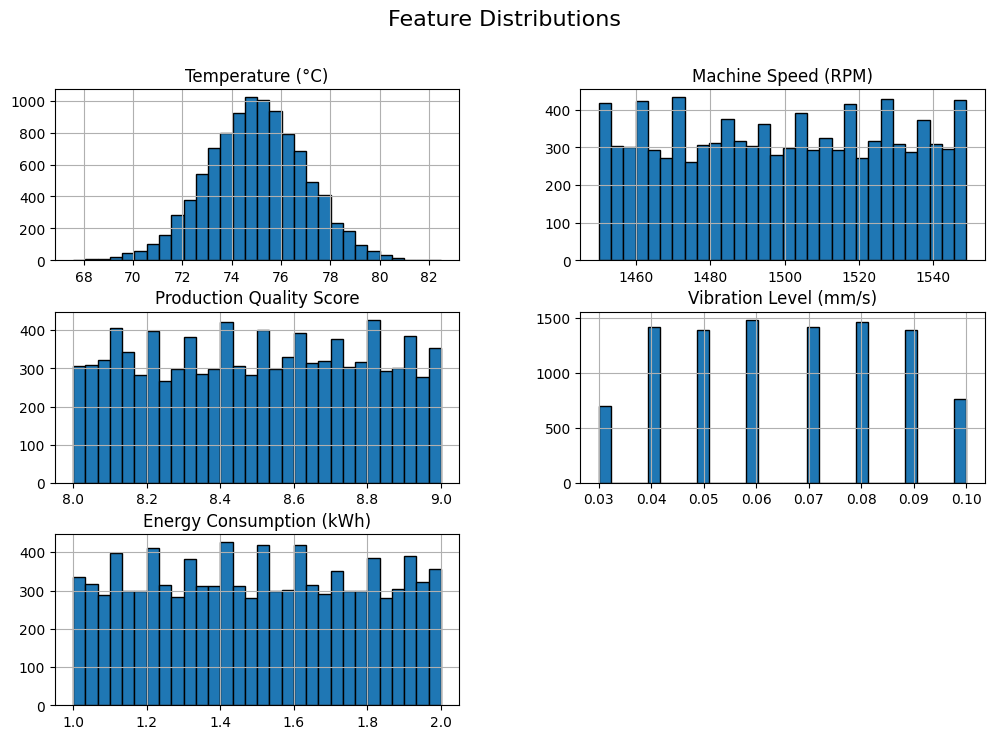

In [ ]:

num_cols = ['Temperature (°C)', 'Machine Speed (RPM)', 'Production Quality Score',
             'Vibration Level (mm/s)', 'Energy Consumption (kWh)']

df[num_cols].hist(bins=30, figsize=(12,8), edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()


## Correlation Heatmap

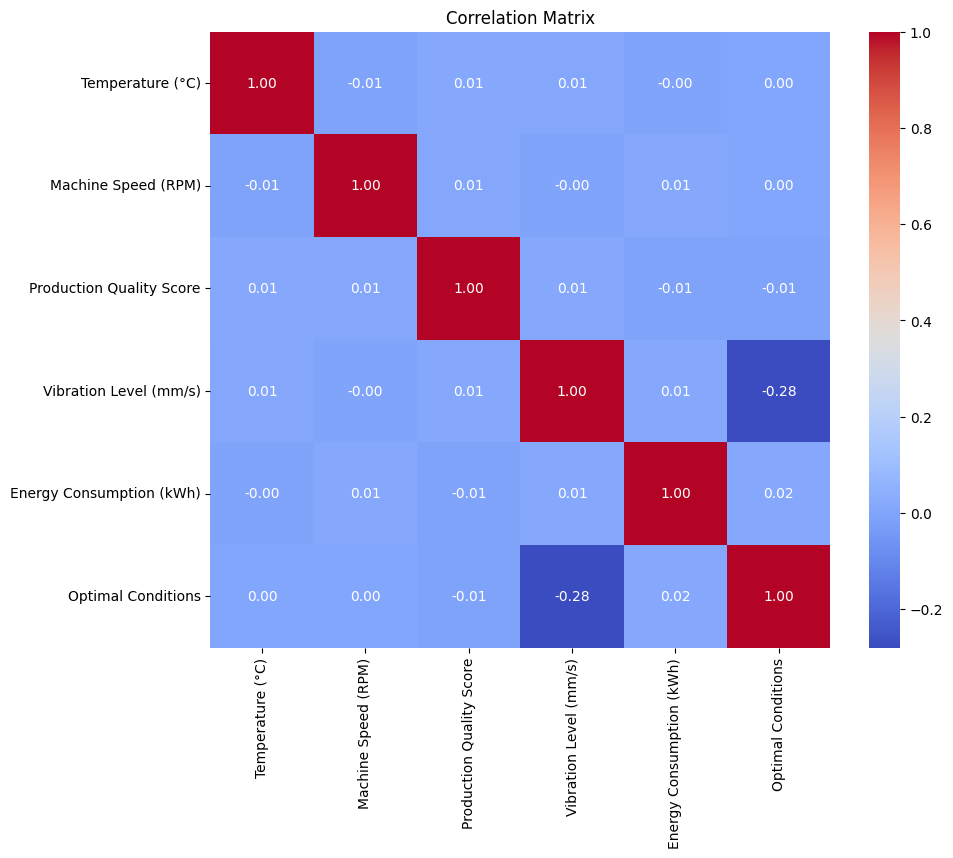

In [ ]:

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


## Temperature vs Production Quality Score

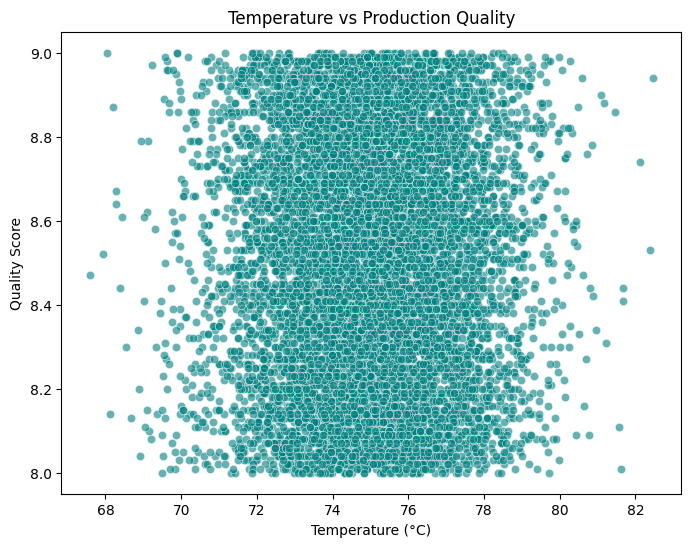

In [ ]:

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Temperature (°C)', y='Production Quality Score', alpha=0.6, color='teal')
plt.title('Temperature vs Production Quality')
plt.xlabel('Temperature (°C)')
plt.ylabel('Quality Score')
plt.show()


## Machine Speed vs Production Quality Score

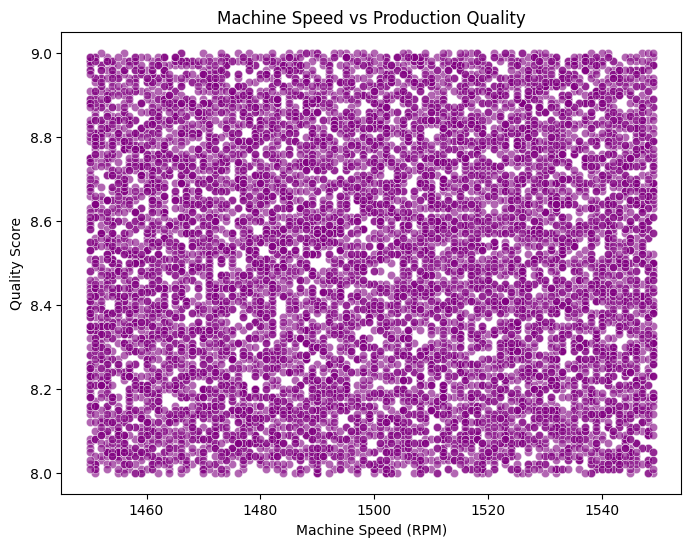

In [ ]:

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Machine Speed (RPM)', y='Production Quality Score', alpha=0.6, color='purple')
plt.title('Machine Speed vs Production Quality')
plt.xlabel('Machine Speed (RPM)')
plt.ylabel('Quality Score')
plt.show()


## Vibration vs Energy Consumption

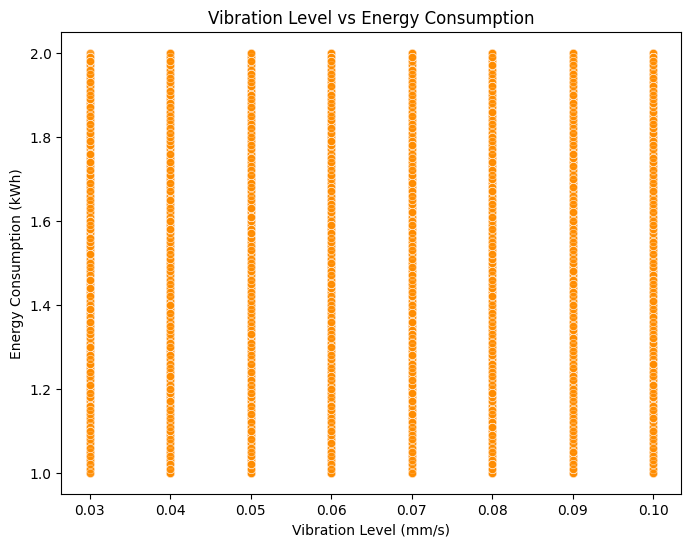

In [ ]:

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Vibration Level (mm/s)', y='Energy Consumption (kWh)', alpha=0.6, color='darkorange')
plt.title('Vibration Level vs Energy Consumption')
plt.xlabel('Vibration Level (mm/s)')
plt.ylabel('Energy Consumption (kWh)')
plt.show()


## Optimal Conditions Analysis

/tmp/ipython-input-759625307.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Optimal Conditions', palette='Set2')


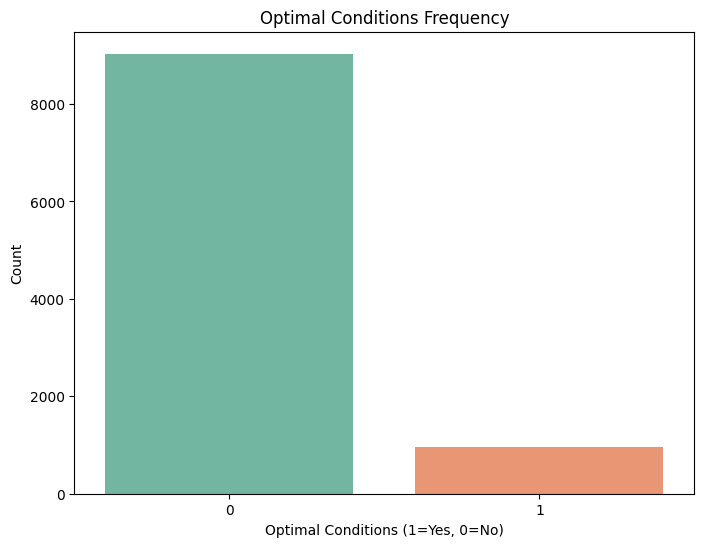

,Temperature (°C),Machine Speed (RPM),Production Quality Score,Vibration Level (mm/s),Energy Consumption (kWh)
Optimal Conditions,,,,,
0,74.986793,1499.522692,8.501414,0.067103,1.49763
1,75.013851,1499.933747,8.495466,0.047588,1.51236


In [ ]:

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Optimal Conditions', palette='Set2')
plt.title('Optimal Conditions Frequency')
plt.xlabel('Optimal Conditions (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()

# Compare average metrics under optimal vs non-optimal conditions
df.groupby('Optimal Conditions')[['Temperature (°C)', 'Machine Speed (RPM)', 'Production Quality Score',
                                  'Vibration Level (mm/s)', 'Energy Consumption (kWh)']].mean()
